# 변수
- 데이터를 저장하는 공간의 이름
> 전역변수
- 어디서든 사용할 수 있는 변수
> 지역변수
- 특정 영역에서 사용할 수 있는 변수
- 영역을 벗어나면 사용이 불가능
> 매개변수
- 함수에서 특정한 인자값을 받아오기 위한 변수
> 클래스변수
- 하나의 클래스에서 독립적이지 않고 공유하는 변수

In [57]:
a = 10
b = 'test'

print(a, b)

10 test


# 경로 (절대 경로 / 상대 경로)
> 절대 경로
- 절대적인 주소
- 환경에 상관없이 고정된 위치를 표현
- ex) "C\users\document", "https://www.google.com"
> 상대 경로
- 상대적인 주소
- 환경에 따라서 주소가 변화
- 현재 작업 중인 디렉토리에서 이동
- ex)
    - 현재 디렉토리 : ./
    - 상위 디렉토리 : ../
    - 하위 디렉토리 : (./)폴더명/
    - 상위에서 상위로 한번 더 이동 : ../../

In [58]:
# 결측치를 확인하는 방법
# isna().sum() -> 결측치의 개수를 확인
# isna() : 결측치인 경우에는 True, 결측치가 아닌 경우에는 False
# True는 1로 표현, False는 0으로 표현 -> sum()을 하면 결측치의 개수 확인 가능
# info()를 이용하여 데이터의 개수를 확인

In [59]:
# 데이터프레임에서 통계 요약 정보를 확인하는 함수 -> describe()
# 데이터의 개수, 평균값, 표준편차, 최소값, 최대값, 1사분위, 중앙값, 3사분위 값을 확인이 가능
# 데이터의 형태가 숫자의 형태여야 출력


In [60]:
# drop() : 특정 컬럼이나 특정 인덱스를 삭제
# drop(조건, axis = n, inplace = bool)
# axis 속성의 값은 0 : 헹, 1 : 열
# inplace 속성은 True : 기준이 되는 데이터프레임을 변경
#              False : 기준이 되는 데이터프레임을 변경하지 않는다 (기본값)

1. Region, Country, Sales Channel, Units Sold, Unit Price, Unit Cost 컬럼만 따로 추출
2. 컬럼의 이름을 권역, 국가, 판매채널, 판매개수, 단가, 원가
3. 총단가, 총원가, 총이윤 이라는 파생변수
4. 권역 별 총이윤의 평균을 그래프로 표시 (바 그래프)
5. 국가별 판매채널에 따른 총이윤의 합계를 그래프로 표시 (바 그래프)

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# 상위 폴더에서 csv 폴더 안의 Sales Records.csv 파일을 로드
# 상대 경로
df = pd.read_csv('../csv/Sales Records.csv', usecols=[0, 1, 3, 8, 9, 10])
# 절대 경로
# pd.read_csv('/Users/taewon/Documents/GitHub/python_01/csv/Sales Records.csv')

In [63]:
# df.drop(['Item Type'], axis = 1, inplace = True)

# 특정한 컬럼만 출력
# df[['Region', 'Country', 'Sales Channel', 'Units Sold', 'Unit Price', 'Unit Cost']]
# df.loc[:, 'Region', 'Country', 'Sales Channel', 'Units Sold', 'Unit Price', 'Unit Cost']

In [64]:
# 특정한 컬럼의 이름을 하나만 변경하려면?
# rename(dict)
df.columns = [
    '권역', 
    '국가', 
    '판매채널', 
    '판매개수', 
    '단가',
    '원가'
]

In [65]:
df['총단가'] = df['판매개수'] * df['단가']
df['총원가'] = df['판매개수'] * df['원가']
df['총이윤'] = df['총단가'] - df['총원가']

In [66]:
df.head(1)

,권역,국가,판매채널,판매개수,단가,원가,총단가,총원가,총이윤
0,Sub-Saharan Africa,Chad,Online,4484,651.21,524.96,2920025.64,2353920.64,566105.0


# 그룹화
> groupby()
- 특정한 컬럼을 지정하여 데이터들이 같은 값들을 그룹화
- 그룹화 된 데이터들의 평균이나, 합계, 최대, 최소, 표준편차와 같은 통계량을 생성
> pivot_table()
- 인덱스와 컬럼, 밸류를 지정하여 그룹화
- 그룹화 된 데이터들의 통계량을 생성

<Axes: ylabel='권역'>

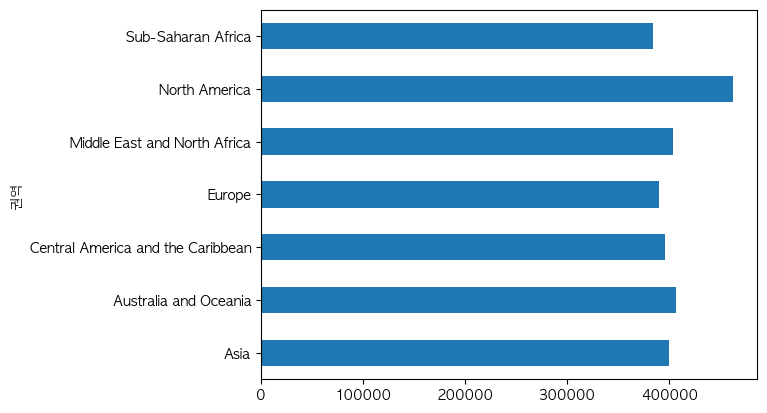

In [67]:
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'MalgunGothic')

df.groupby('권역')['총이윤'].mean().plot.barh()

<Axes: ylabel='권역'>

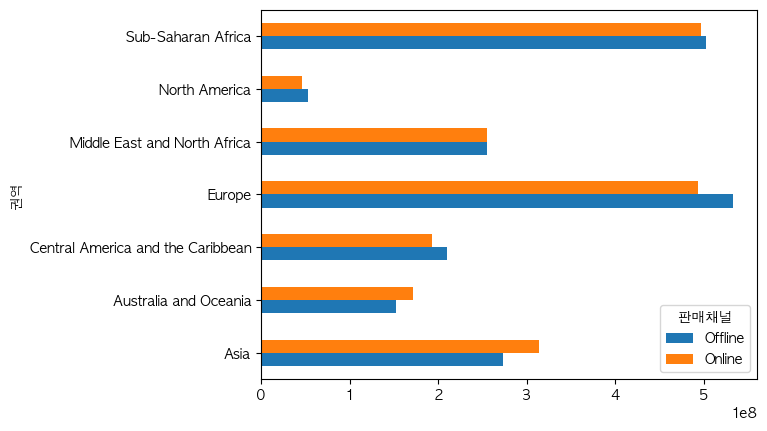

In [71]:
# 국가별 판매채널에 따른 총이윤의 합계를 그래프로
pd.pivot_table(
    df,
    index = '권역',
    columns = '판매채널',
    values = '총이윤',
    aggfunc = 'sum'
).plot.barh()

# 인덱스를 이동하는 함수
> shift(n)
- 인덱스를 n만큼 이동
- n = 1이 기본값 : 바로 전의 인덱스의 값을 가지고 온다.
- 다음의 인덱스의 값을 가지고 오려면?  n = -1

# 값의 차이를 출력하는 함수
> diff(periods = n)
- 바로 전의 인덱스의 값과의 차이를 출력
- periods 기본값은 1 shift와 마찬가지로 행, 열의 수를 지정

# 결측치를 다른 값으로 대체하는 함수
> fillna(n, method=?)
- n을 지정하면 해당하는 값으로 결측치가 대체
- method 속성 : ffill, bfill
    - ffill : 전의 행의 값이 존재하면 그 값으로 대체
    - bfill : 후의 행의 값이 존재하면 그 값으로 대체


In [77]:
corona = pd.read_csv('../csv/corona.csv' ,index_col=[0])

In [82]:
corona['accDefRate'] = corona['accDefRate'].fillna(method='bfill')

> apply()
- 데이터프레임에서 각 항목들의 데이터를 변환시켜주는 함수
- 표의 형태의 각 셀의 값 -> apply(연산) -> 연산 안의 각 셀의 값을 넣어서 변환
> lambda()
- 함수를 선언과 동시에 호출을 하는 함수
> map()
- 리스트, 튜플의 형태의 데이터의 각 항목들을 변환시켜주는 함수

In [96]:
# apply를 사용하여 새로운 파생변수 (H/L)에 accDefRate의 값이 1.55보다 크면 High
# 아니면 Low의 값을 대입

def change(x):
    if x > 1.55:
        return 'High'
    else:
        return 'Low'

corona['accDefRate'].apply(change)

<bound method IndexOpsMixin.value_counts of 0      High
1      High
2      High
3      High
4      High
       ... 
815    High
816    High
817    High
818    High
819    High
Name: accDefRate, Length: 820, dtype: object>

In [97]:
# apply + lambda

# if문을 한 줄로 사용 : 참인 경우 값 if 조건식 else 거짓인 경우 값

corona['accDefRate'].apply(lambda x : 'High' if x > 1.55 else 'Low')

0      High
1      High
2      High
3      High
4      High
       ... 
815    High
816    High
817    High
818    High
819    High
Name: accDefRate, Length: 820, dtype: object

# 데이터프레임의 결합
> concat()
- axis 속성 0, 1 행을 결합을 할지, 열을 결합을 할지 지정
- 단순하게 데이터프레임을 결합
> merge()
- 특정한 조건을 기준으로 하여 데이터프레임을 결합
- on 속성에서 합쳐질 데이터프레임의 조건을 넣어주는 부분(컬럼의 이름)
- 조건에 맞는 컬럼의 값을 넣어준다
- how 속성
    - left : 왼쪽에 있는 데이터프레임을 기준으로 결합
    - right : 오른쪽에 있는 데이터프레임을 기준으로 결합
    - inner : 두 데이터프레임의 교집합
    - outer : 두 데이터프레임의 합집합

In [215]:
# csv폴더 안에 num_3 폴더에 있는 파일들을 로드하여 데이터프레임 결합
# 4개의 파일 모두 조인 결합
campaign = pd.read_csv('../csv/num_3/campaign_master.csv')
class_master = pd.read_csv('../csv/num_3/class_master.csv')
customer_master = pd.read_csv('../csv/num_3/customer_master.csv')
use_log = pd.read_csv('../csv/num_3/use_log.csv')

In [216]:
# campaign.head(1)
# class_master.head(1)
# customer_master.head(1)
# use_log.head(1)

In [217]:
data = pd.merge(customer_master, campaign, on='campaign_id', how='inner')

In [218]:
data2 = pd.merge(data, use_log, on='customer_id', how='inner')

In [219]:
data3 = pd.merge(data2, class_master, on='class', how='inner')

In [220]:
data3.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,log_id,usedate,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,2_일반,L00000049014216,2018-04-04,0_종일,10500


# 시계열 데이터
> to_datetime(데이터, format=)
- 해당하는 데이터를 시계열 데이터로 변환
- format의 속성은 변경 시키려는 데이터의 구성을 대입
- ex) 202001 -> format = '%Y%m'

In [221]:
# start_date 컬럼의 데이터의 타입을 시계열 변경
# 2019년 1월 1일 이후 데이터만 출력

In [222]:
data3['start_date'] = pd.to_datetime(data3['start_date'], format='%Y-%m-%d %H:%M:%S')

In [223]:
data3.sort_values(by= ['start_date'], inplace=True)

In [224]:
data3.loc[data3['start_date'] >= '2019-01-01']

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,log_id,usedate,class_name,price
71387,IK283032,XXXX,C01,M,2019-01-01,NaN,CA1,0,2_일반,L00000049162103,2019-01-03,0_종일,10500
71386,IK283032,XXXX,C01,M,2019-01-01,NaN,CA1,0,2_일반,L00000049161118,2019-01-01,0_종일,10500
71385,OA106766,XXXXX,C01,F,2019-01-01,NaN,CA1,0,2_일반,L00000049209574,2019-03-31,0_종일,10500
71384,OA106766,XXXXX,C01,F,2019-01-01,NaN,CA1,0,2_일반,L00000049206905,2019-03-26,0_종일,10500
71379,OA106766,XXXXX,C01,F,2019-01-01,NaN,CA1,0,2_일반,L00000049195897,2019-03-05,0_종일,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185934,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,L00000049203747,2019-03-20,1_주간,7500
185935,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,L00000049204803,2019-03-22,1_주간,7500
185936,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,L00000049205312,2019-03-23,1_주간,7500
185937,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,L00000049206326,2019-03-25,1_주간,7500


1. 이용내역
2. 파생변수 2개 생성
3. weekday 요일 파생변수(usedate를 기준으로 요일 생성)
4. 년월 파생변수 하나 생성(usedate를 기준으로 생성)
5. 요일별 이용 여부를 계산

In [225]:
data3['usedate'] = pd.to_datetime(data3['usedate'])

In [227]:
data3['weekday'] = data3['usedate'].dt.weekday

In [229]:
data3['년월'] = data3['usedate'].dt.strftime('%Y-%m')

In [233]:
data3['weekday'].value_counts().sort_values(ascending=False)

weekday
6    29351
4    28735
2    28644
0    28095
1    28023
3    27822
5    26758
Name: count, dtype: int64

In [241]:
use_weekday = data3.groupby(['customer_id', '년월', 'weekday'], as_index=False).count()\
    [['customer_id', '년월', 'weekday','log_id']]

use_weekday.rename(columns={'log_id' : 'count'}, inplace=True)
use_weekday.head(3)

,customer_id,년월,weekday,count
0,AS002855,2018-04,5,4
1,AS002855,2018-05,2,1
2,AS002855,2018-05,5,4


In [248]:
# 각 회원별 가장 많은 count를 가지는 요일을 출력
use_weekday.groupby(['customer_id', 'weekday']).max()[['count']]

count
customer_id weekday       
AS002855    0            1
            1            1
            2            1
            3            2
            4            1
...                    ...
TS999855    2            1
            3            1
            4            4
            5            5
            6            1

[26047 rows x 1 columns]

# 함수
- 행동
- 반복적인 코드가 실행이 되어야 하는 경우 코드를 반복해서 사용하면 코드의 라인이 증가하고
- 가독성이 하락하게 되며, 코드가 길어짐으로써 에러가 발생할 확률이 증가
- def 키워드를 이용하여 함수를 선언

In [249]:
# 함수를 생성
# 인자의 값이 숫자의 형태가 아니면 숫자의 형태가 아니다
# 숫자인 경우 짝수이면 짝수
# 홀수이면 홀수 출력

In [265]:
def func_1(x):
    if type(x) == float:
        return '인자의 타입은 실수이다'
    elif type(x) != int:
        return '숫자의 형태가 아니다'
    else:
        if x % 2 == 0:
            return '짝수' 
        else:
            return '홀수'

In [268]:
print(func_1(3))
print(func_1(6))
print(func_1('가'))
print(func_1(3.45))

홀수
짝수
숫자의 형태가 아니다
인자의 타입은 실수이다


In [270]:
# 함수 생성
# 매개변수 2개
# 두 매개변수 사이 값들의 합 리턴
# 3, 5 -> 3+4+5 -> 12리턴
# 두 매개변수의 대소관계는 상관없이 사이의 값들의 합

In [383]:
def func_2(x, y):
    result = 0
    if x < y :
        for i in range(x, y+1, 1):
            result += i
    else : 
        for i in range(y, x+1, 1):
            result += i
    
    return result


In [386]:
def func_3(x, y):
    result = 0

    for i in range(min(x, y), max(x, y)+1, 1):
        result += i
    return result

In [387]:
func_3(10,1)

55

In [277]:
# 함수 생성
# 매개변수는 1개
# 인자값이 12345
# 1+2+3+4+5의 값인 15가 출력이 되도록 함수를 구성

In [282]:
def func_4(x):
    result = 0
    for i in str(x):
        result += int(i)
    return result

In [283]:
func_4(12345)

15

In [288]:
def func_5(x):
    result = 0

    while x // 10 > 0:
        result += x % 10
        x = x // 10
    result += x
    return result

In [289]:
func_5(12345)

15

In [293]:
def func_6(x):
    result = sum(map(int, str(x)))
    return result
func_6(12345)

15

In [296]:
import pandas as pd

In [299]:
df = pd.read_excel('./kospi.xlsx', usecols=[0, 1, 2, 3, 4], index_col='Date')

In [301]:
# 변동 파생변수
df['change'] = df['High'] - df['Low']

In [303]:
# 전일변동 파생변수
df['전일변동'] = df['change'].shift()

In [306]:
# 목표가 = 시가 + 전일변동 + 0.5
df['목표가'] = df['Open'] + df['전일변동'] * 0.5

1. 목표가보다 고가가 높으면 목표가로 매수
2. 수익률 -> 종가 - 목표가 / 목표가 + 1
3. 그 외의 수익률은 1

In [314]:
acc_rtn = 1
for i in df.index:
    if df.loc[i, 'High'] > df.loc[i, '목표가']:
        rtn = (df.loc[i, 'Close'] -df.loc[i, '목표가']) / df.loc[i, '목표가'] + 1
        df.loc[i, '수익률'] = rtn
    else:
        rtn = 1
        df.loc[i, '수익률'] = rtn

    acc_rtn *= rtn
    df.loc[i, '누적수익률'] = acc_rtn

In [319]:
import numpy as np
# np.where(조건식, 참인 경우 값, 거짓인 경우 값)
df['수익률2'] = np.where(df['High'] >= df['목표가'],
                         (df['Close']- df['목표가']) / df['목표가'] + 1,
                         1)

In [321]:
(df['수익률'] == df['수익률2']).value_counts()

True    5349
Name: count, dtype: int64

In [322]:
# 누적수익률
# 누적곱 -> cumprod()
df['누적수익률2'] = df['수익률2'].cumprod()

In [323]:
df.head(5)

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2
Date,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.0,1.0,1.0,1.0
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.0,1.0,1.0,1.0
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.0,1.0,1.0,1.0
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.0,1.0,1.0,1.0
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.0,1.0,1.0,1.0


In [324]:
(df['누적수익률'] == df['누적수익률2']).value_counts()

True    5349
Name: count, dtype: int64

In [326]:
# CAGR -> 연복리수익률
# 누적수익률 ** (1 / (투자기간/365)) - 1
# 시계열데이터를 이용하여 기간
delta = df.index[-1] - df.index[0]
delta.days

7906

In [327]:
year = delta.days/365
CAGR = df['누적수익률'].iloc[-1] ** (1/year) - 1
print('CAGR : ', CAGR * 100)

CAGR :  7.941722848934241


In [342]:
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'MalgunGothic')

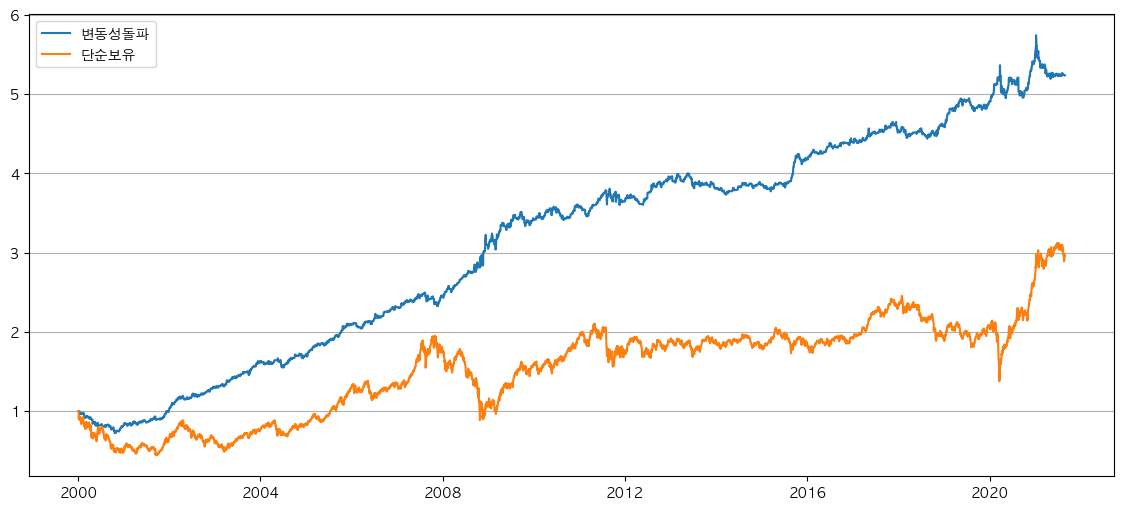

In [344]:
# 변동성돌파전략의 누적 수익률을 라인그래프로 표시
# 바이앤홀드 누적수익률을 라인그래프로 표시

# 그래프 사이즈를 조절
plt.figure(figsize=(14, 6))
# grid 추가
plt.grid(True, axis='y')
plt.plot(df['누적수익률'], label = '변동성돌파')
plt.plot(df['Close'] / df['Close'].iloc[0], label = '단순보유')
plt.legend()
plt.show()

In [348]:
# DD -> (1 - 누적수익률 / 전고점) * 100
df['전고점'] = df['누적수익률'].cummax()
df['DD'] = (1 - df['누적수익률'] / df['전고점']) * 100

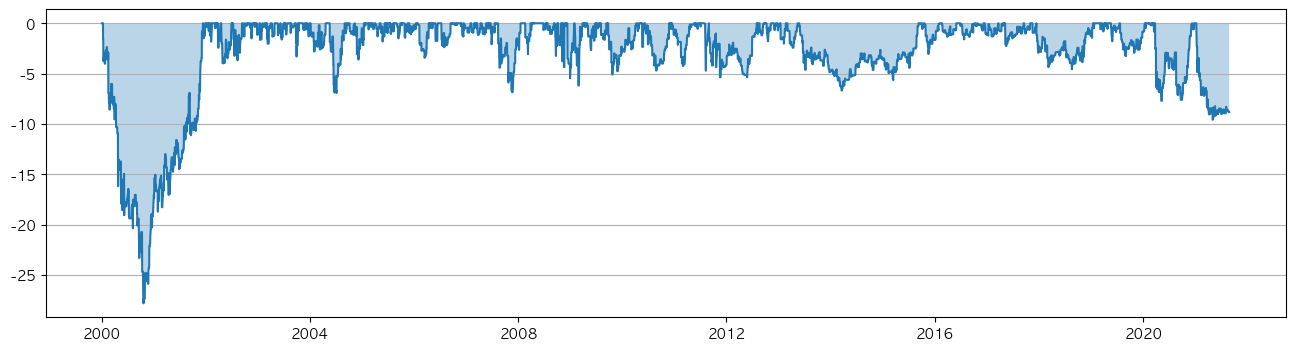

In [357]:
# 음수를 표시
plt.rc('axes', unicode_minus = False)
plt.figure(figsize=(16, 4))
plt.grid(True, axis='y')
plt.plot(-df['DD'])
plt.fill_between(df.index, -df['DD'], alpha=0.3)
plt.show()

In [350]:
print('MDD : ', df['DD'].max())

MDD :  27.779726849588627


In [359]:
# 10일치의 이동평균선
df['MA10'] = df['Close'].rolling(10).mean()
df.iloc[8:12]

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,수익률2,누적수익률2,전고점,DD,MA10
Date,,,,,,,,,,,,,,
2000-01-14,948.03,958.82,970.59,937.75,32.84,21.48,969.560,0.977794,0.962386,0.977794,0.962386,1.0,3.761404,NaN
2000-01-17,983.27,962.67,986.09,950.75,35.34,32.84,979.090,1.004269,0.966495,1.004269,0.966495,1.0,3.350535,976.072
2000-01-18,981.53,992.31,992.85,967.96,24.89,35.34,1009.980,1.000000,0.966495,1.000000,0.966495,1.0,3.350535,968.321
2000-01-19,938.78,969.31,977.00,938.74,38.26,24.89,981.755,1.000000,0.966495,1.000000,0.966495,1.0,3.350535,963.568


In [360]:
df['매매신호'] = df['Open'] > df['MA10'].shift(1)

In [362]:
# 수익률 계산 방법 -> 매매신호가 1이고, 고가가 목표가보다 높은 경우
df['수익률2'] = np.where(
    (df['매매신호'] == 1) & (df['High'] >= df['목표가']),
        df['Close'] / df['목표가'],
        1
)

In [363]:
df['누적수익률2'] = df['수익률2'].cumprod()

In [364]:
df['누적수익률2'].iloc[-1]

2.1876587800244023

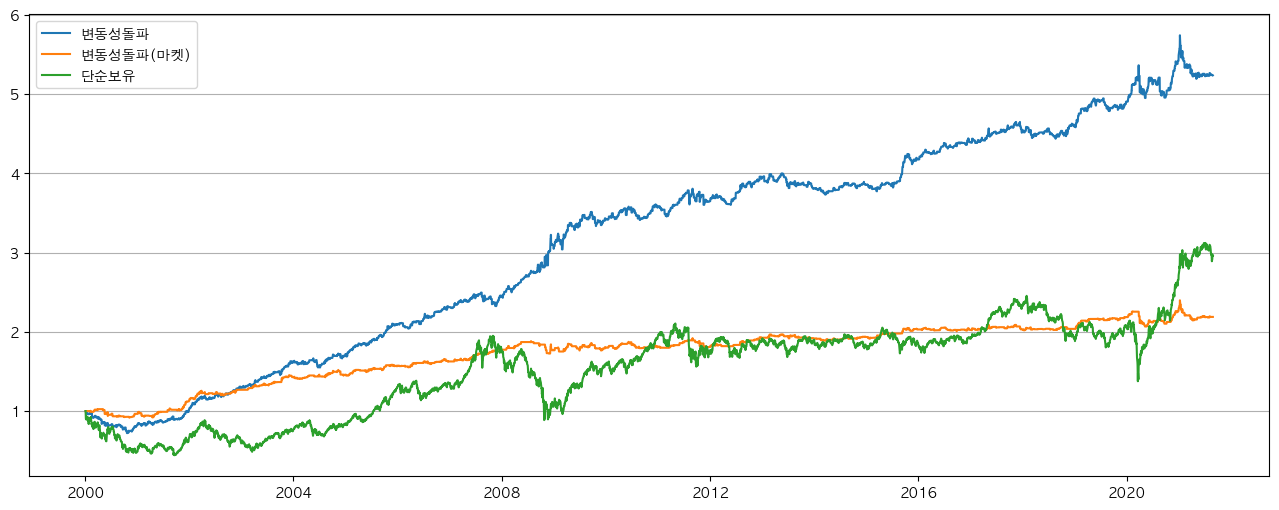

In [376]:
plt.figure(figsize=(16, 6))
plt.grid(True, axis='y')
plt.plot(df['누적수익률'], label = '변동성돌파')
plt.plot(df['누적수익률2'], label = '변동성돌파(마켓)')
plt.plot(df['Close'] / df['Close'].iloc[0], label = '단순보유')
plt.legend()
plt.show()

In [379]:
df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1- df['누적수익률2'] / df['전고점2']) * 100

In [380]:
df['DD2'].max()

10.556892232762005

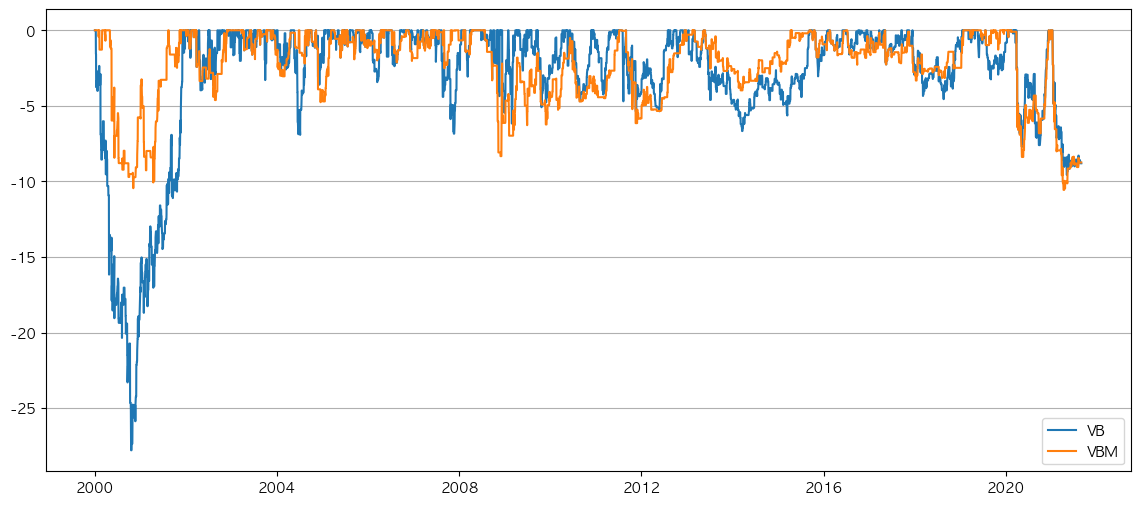

In [382]:
plt.rc('axes', unicode_minus = False)
plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(-df['DD'], label = 'VB')
plt.plot(-df['DD2'], label = 'VBM')
plt.legend()
plt.show()